In [2]:
import sys
sys.path.append("../")
from src import data
import pandas as pd
import numpy as np
import scipy.stats

Let's get the two dataframes

In [3]:
pop_songs, non_pop_songs = data.get_split_dfs(drop_columns=['id','name','popularity','key'])

We try to calculate the F value now for 10000 bootstrapped sampled each to estimate our certainty about the variance calculation.

In [4]:

F_values = pd.DataFrame()
for i in range(10000):
    pop_resampled = pop_songs.sample(frac=1, replace=True)
    assert pop_resampled.shape == (pop_songs.shape)
    non_pop_resampled = non_pop_songs.sample(frac=1, replace=True)
    assert non_pop_resampled.shape == (non_pop_resampled.shape)
    F = non_pop_resampled.var() / pop_resampled.var()
    F_values = F_values.append(F, ignore_index=True)

Let's analyse the variance estimations for all samples

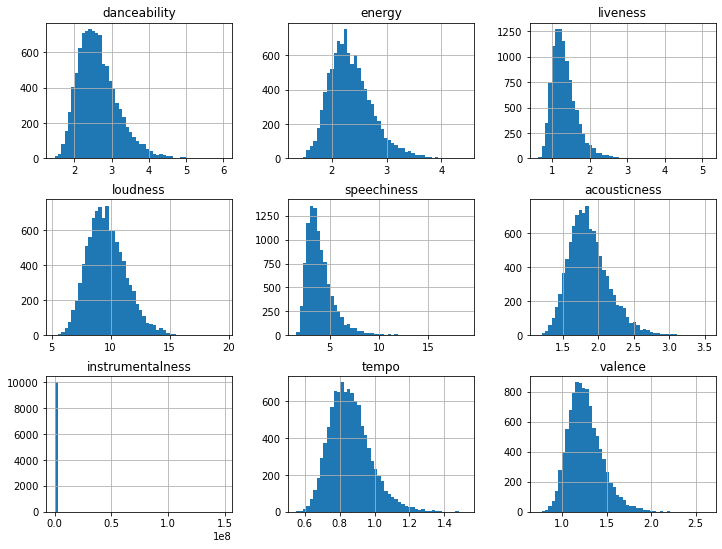

In [34]:
F_values.hist(figsize=(12,9), bins=50)
print('')

Let's find 95% HDIs

In [1]:
for col in F_values.columns:
    if col == "instrumentalness": continue
    bins = np.histogram(F_values.loc[:,[col]], bins=1000)

    weights = bins[0] / sum(bins[0])
    ordered_weights = weights[np.flip(np.argsort(bins[0]))]
    limit = np.min(np.where(np.cumsum(ordered_weights) > .95))

    hdi_bins = np.append(weights > weights[limit], False)
    lower = np.min(bins[1][hdi_bins])
    upper = np.max(bins[1][hdi_bins])
    print(lower, upper)

NameError: name 'F_values' is not defined

Let's calculate how many of those values are above the critical value each:

In [6]:
f_crit = scipy.stats.f.ppf(q=(1-0.05/9), dfn=(len(non_pop_songs)-1), dfd=(len(pop_songs))-1)
np.mean(F_values > f_crit) * 100

danceability         99.74
energy               99.32
liveness             17.05
loudness            100.00
speechiness          99.98
acousticness         82.59
instrumentalness    100.00
tempo                 0.00
valence               4.70
dtype: float64

Let's see what appens if we resample equal sample sizes

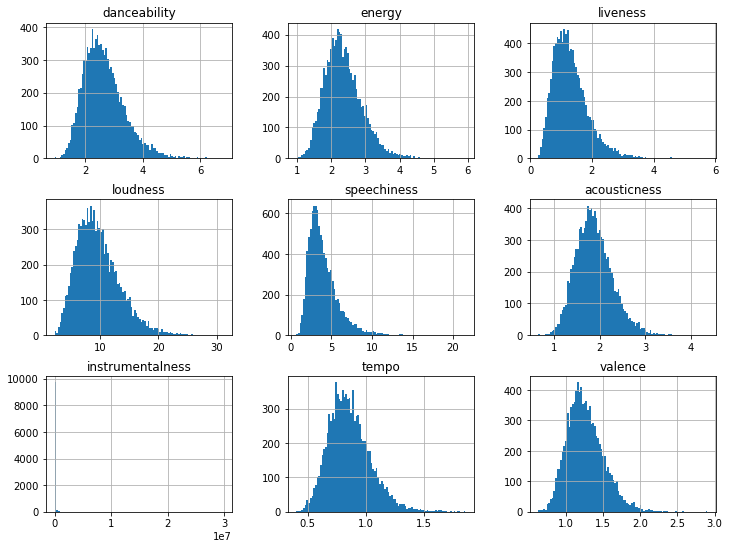

In [7]:
F_values_eq = pd.DataFrame()
for i in range(10000):
    pop_resampled = pop_songs.sample(frac=1, replace=True)
    assert pop_resampled.shape == (pop_songs.shape)
    non_pop_resampled = non_pop_songs.sample(n=pop_songs.shape[0], replace=True)
    assert non_pop_resampled.shape == (pop_songs.shape) # now check that sample sizes match
    F = non_pop_resampled.var() / pop_resampled.var()
    F_values_eq = F_values_eq.append(F, ignore_index=True)
F_values_eq.hist(figsize=(12,9), bins=100)
print('')